In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting

from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import shutil


# Libraries for get_images function
import matplotlib.image as mpimg
from skimage.transform import resize

import os
import xml.etree.ElementTree as ET
from PIL import Image, ImageOps

import tensorflow as tf
from keras import layers, models, preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



In [2]:
print(os.listdir('./Data'))
images_dir = "./Data/images/Images"
annotations_dir = "./Data/annotations/Annotation"
output_dir = "./Data/Datasets"

['Resized', '.DS_Store', 'images', 'Datasets', 'annotations']


In [6]:
def copy_files(breed, image_file, image_dir, annotation_dir, dest_images_folder, dest_annotations_folder):
    """Copy image and corresponding annotation files to the destination folder."""
    annotation_file = image_file.replace(".jpg", "")
    image_path = os.path.join(image_dir, image_file)
    annotation_path = os.path.join(annotation_dir, annotation_file)
    if not os.path.exists(image_path):
        print(f"Missing image: {image_path}")
        return
    if not os.path.exists(annotation_path):
        print(f"Missing annotation: {annotation_path}")
        return

    # Create destination folders for the breed
    os.makedirs(os.path.join(dest_images_folder, breed), exist_ok=True)
    os.makedirs(os.path.join(dest_annotations_folder, breed), exist_ok=True)
    shutil.copy(image_path, os.path.join(dest_images_folder, breed, image_file))
    shutil.copy(annotation_path, os.path.join(dest_annotations_folder, breed, annotation_file))

In [7]:

import os
import shutil
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

def split_dataset(images_folder, annotations_folder, output_folder, test_size=0.2, val_size=0.2, random_state=42):
    """
    Split the dataset of images and annotations into train, val, and test sets.

    Args:
        images_folder (str): Path to the folder containing images organized by class.
        annotations_folder (str): Path to the folder containing annotation files organized by class.
        output_folder (str): Path to save the split dataset (train/val/test for images and annotations).
        test_size (float): Proportion of the dataset to include in the test set.
        val_size (float): Proportion of the training data to use for validation.
        random_state (int): Random seed for reproducibility.
    """
    # Paths for train/val/test splits
    train_images_folder = os.path.join(output_folder, "train", "images")
    val_images_folder = os.path.join(output_folder, "val", "images")
    test_images_folder = os.path.join(output_folder, "test", "images")
    train_annotations_folder = os.path.join(output_folder, "train", "annotations")
    val_annotations_folder = os.path.join(output_folder, "val", "annotations")
    test_annotations_folder = os.path.join(output_folder, "test", "annotations")

    # Create output directories
    os.makedirs(train_images_folder, exist_ok=True)
    os.makedirs(val_images_folder, exist_ok=True)
    os.makedirs(test_images_folder, exist_ok=True)
    os.makedirs(train_annotations_folder, exist_ok=True)
    os.makedirs(val_annotations_folder, exist_ok=True)
    os.makedirs(test_annotations_folder, exist_ok=True)

    # Process each breed
    for breed in os.listdir(images_folder):
        breed_images_dir = os.path.join(images_folder, breed)
        breed_annotations_dir = os.path.join(annotations_folder, breed)

        # Skip if not a directory
        if not os.path.isdir(breed_images_dir) or not os.path.isdir(breed_annotations_dir):
            print(f"Skipping non-directory: {breed}")
            continue

        # Get all images
        images = [f for f in os.listdir(breed_images_dir) if f.endswith(".jpg")]

        if not images:
            print(f"No images found in: {breed_images_dir}")
            continue

        # Split into train + val and test
        train_val_images, test_images = train_test_split(images, test_size=test_size, random_state=random_state)
        # Split train + val into train and val
        train_images, val_images = train_test_split(train_val_images, test_size=val_size, random_state=random_state)

        # Copy train images and annotations
        for image_file in train_images:
            copy_files(breed, image_file, breed_images_dir, breed_annotations_dir, train_images_folder, train_annotations_folder)

        # Copy val images and annotations
        for image_file in val_images:
            copy_files(breed, image_file, breed_images_dir, breed_annotations_dir, val_images_folder, val_annotations_folder)

        # Copy test images and annotations
        for image_file in test_images:
            copy_files(breed, image_file, breed_images_dir, breed_annotations_dir, test_images_folder, test_annotations_folder)

    print(f"Dataset split into train, val, and test sets. Saved to: {output_folder}")


In [8]:

split_dataset(images_dir, annotations_dir, output_dir)

Skipping non-directory: .DS_Store
Dataset split into train, val, and test sets. Saved to: ./Data/Datasets


In [9]:

def resize_images(input_folder, output_folder, target_size=(224, 224)):
    """
    Resize images to the target size while maintaining aspect ratio with padding.

    Args:
        input_folder (str): Path to the input folder containing images organized by class.
        output_folder (str): Path to save resized images.
        target_size (tuple): Target size as (width, height).
    """
    os.makedirs(output_folder, exist_ok=True)

    for root, _, files in os.walk(input_folder):
        for file in files:
            if file.endswith(".jpg"):
                input_path = os.path.join(root, file)
                output_path = os.path.join(output_folder, os.path.relpath(input_path, input_folder))
                
                # Create output directories if they don't exist
                os.makedirs(os.path.dirname(output_path), exist_ok=True)

                # Open the image
                with Image.open(input_path) as img:
                    # Resize image with padding
                    img_resized = ImageOps.fit(img, target_size, method=Image.LANCZOS, centering=(0.5, 0.5))
                    img_resized.save(output_path)

                print(f"Resized and saved: {output_path}")


In [10]:
input_folder = "./Data/Datasets/train/images"
output_folder = "./Data/Resized/train/images"
resize_images(input_folder, output_folder, target_size=(224, 224))

Resized and saved: ./Data/Resized/train/images/n02091244-Ibizan_hound/n02091244_2782.jpg
Resized and saved: ./Data/Resized/train/images/n02091244-Ibizan_hound/n02091244_5774.jpg
Resized and saved: ./Data/Resized/train/images/n02091244-Ibizan_hound/n02091244_1076.jpg
Resized and saved: ./Data/Resized/train/images/n02091244-Ibizan_hound/n02091244_5238.jpg
Resized and saved: ./Data/Resized/train/images/n02091244-Ibizan_hound/n02091244_2542.jpg
Resized and saved: ./Data/Resized/train/images/n02091244-Ibizan_hound/n02091244_5601.jpg
Resized and saved: ./Data/Resized/train/images/n02091244-Ibizan_hound/n02091244_1856.jpg
Resized and saved: ./Data/Resized/train/images/n02091244-Ibizan_hound/n02091244_879.jpg
Resized and saved: ./Data/Resized/train/images/n02091244-Ibizan_hound/n02091244_110.jpg
Resized and saved: ./Data/Resized/train/images/n02091244-Ibizan_hound/n02091244_5818.jpg
Resized and saved: ./Data/Resized/train/images/n02091244-Ibizan_hound/n02091244_448.jpg
Resized and saved: ./Dat

In [11]:
input_folder_val = "./Data/Datasets/val/images"
output_folder_val = "./Data/Resized/val/images"
resize_images(input_folder_val, output_folder_val, target_size=(224, 224))

Resized and saved: ./Data/Resized/val/images/n02091244-Ibizan_hound/n02091244_5774.jpg
Resized and saved: ./Data/Resized/val/images/n02091244-Ibizan_hound/n02091244_879.jpg
Resized and saved: ./Data/Resized/val/images/n02091244-Ibizan_hound/n02091244_5818.jpg
Resized and saved: ./Data/Resized/val/images/n02091244-Ibizan_hound/n02091244_3075.jpg
Resized and saved: ./Data/Resized/val/images/n02091244-Ibizan_hound/n02091244_2747.jpg
Resized and saved: ./Data/Resized/val/images/n02091244-Ibizan_hound/n02091244_3921.jpg
Resized and saved: ./Data/Resized/val/images/n02091244-Ibizan_hound/n02091244_1265.jpg
Resized and saved: ./Data/Resized/val/images/n02091244-Ibizan_hound/n02091244_1714.jpg
Resized and saved: ./Data/Resized/val/images/n02091244-Ibizan_hound/n02091244_1072.jpg
Resized and saved: ./Data/Resized/val/images/n02091244-Ibizan_hound/n02091244_5943.jpg
Resized and saved: ./Data/Resized/val/images/n02091244-Ibizan_hound/n02091244_4031.jpg
Resized and saved: ./Data/Resized/val/images

In [12]:
input_folder_test = "./Data/Datasets/test/images"
output_folder_test = "./Data/Resized/test/images"
resize_images(input_folder_test, output_folder_test, target_size=(224, 224))

Resized and saved: ./Data/Resized/test/images/n02091244-Ibizan_hound/n02091244_4669.jpg
Resized and saved: ./Data/Resized/test/images/n02091244-Ibizan_hound/n02091244_4086.jpg
Resized and saved: ./Data/Resized/test/images/n02091244-Ibizan_hound/n02091244_6041.jpg
Resized and saved: ./Data/Resized/test/images/n02091244-Ibizan_hound/n02091244_5038.jpg
Resized and saved: ./Data/Resized/test/images/n02091244-Ibizan_hound/n02091244_5400.jpg
Resized and saved: ./Data/Resized/test/images/n02091244-Ibizan_hound/n02091244_3707.jpg
Resized and saved: ./Data/Resized/test/images/n02091244-Ibizan_hound/n02091244_5982.jpg
Resized and saved: ./Data/Resized/test/images/n02091244-Ibizan_hound/n02091244_3289.jpg
Resized and saved: ./Data/Resized/test/images/n02091244-Ibizan_hound/n02091244_4268.jpg
Resized and saved: ./Data/Resized/test/images/n02091244-Ibizan_hound/n02091244_2427.jpg
Resized and saved: ./Data/Resized/test/images/n02091244-Ibizan_hound/n02091244_1000.jpg
Resized and saved: ./Data/Resize

Perpare the Data
Before training, you need to preprocess the images and organize the dataset.

1. Normalize Pixel Values 

In [13]:
# Set paths
train_dir = "./Data/Resized/train/images"
val_dir = "./Data/Resized/val/images"
test_dir = "./Data/Resized/test/images"

In [14]:
# Define image size and batch size
# Image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [40]:
# Create a data generator for the test set
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load the test dataset
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Important to keep order for evaluation
)


# Data generator for training with augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,       # Normalize pixel values
    rotation_range=10,     # Random rotation
    width_shift_range=0.1, # Horizontal shift
    height_shift_range=0.1,# Vertical shift
    shear_range=0.1,       # Shearing transformation
    zoom_range=0.1,        # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'    # Fill in gaps created by augmentation
)

# Data generator for validation (no augmentation, just normalization)
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Load the training dataset
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # For multi-class classification
    shuffle=True,
    seed= 1337
               # Shuffle training data
)

# Load the validation dataset
val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # For multi-class classification
    shuffle=True,
                                # No shuffling for validation data
)

Found 492 images belonging to 14 classes.
Found 1939 images belonging to 14 classes.
Found 884 images belonging to 14 classes.


In [19]:
import collections
print("Train distribution:", collections.Counter(train_data.classes))
print("Validation distribution:", collections.Counter(val_data.classes))

Train distribution: Counter({6: 161, 4: 156, 7: 156, 3: 150, 1: 149, 0: 148, 8: 145, 5: 143, 12: 124, 13: 124, 11: 123, 2: 120, 9: 120, 10: 120})
Validation distribution: Counter({6: 74, 4: 72, 7: 72, 1: 68, 3: 68, 0: 67, 8: 66, 5: 65, 12: 57, 11: 56, 13: 56, 2: 55, 9: 54, 10: 54})


In [20]:
import numpy as np
from sklearn.metrics import classification_report

# Predict on validation data
val_predictions = model.predict(val_data)
predicted_classes = np.argmax(val_predictions, axis=1)
true_classes = val_data.classes

# Classification report
from sklearn.metrics import classification_report
print(classification_report(true_classes, predicted_classes, target_names=val_data.class_indices.keys()))

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step
                               precision    recall  f1-score   support

   n02085782-Japanese_spaniel       0.24      0.18      0.21        67
         n02088466-bloodhound       0.00      0.00      0.00        68
             n02090622-borzoi       0.00      0.00      0.00        55
       n02091244-Ibizan_hound       0.26      0.15      0.19        68
 n02091467-Norwegian_elkhound       0.00      0.00      0.00        72
 n02093859-Kerry_blue_terrier       0.17      0.34      0.22        65
   n02095889-Sealyham_terrier       0.20      0.78      0.32        74
 n02096294-Australian_terrier       0.22      0.11      0.15        72
        n02096585-Boston_bull       0.24      0.53      0.33        66
n02102973-Irish_water_spaniel       0.16      0.06      0.08        54
        n02105056-groenendael       0.23      0.56      0.32        54
           n02105505-komondor       0.20      0.05      0.08        56
       n02108422-bull_mastiff       

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:

# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.5),  # Regularization
#     Dense(14, activation='softmax')  # 14 classes
# ])
from tensorflow.keras.optimizers import Adam


# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(256, (3, 3), activation='relu'),  # Add more layers
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(512, activation='relu'),  # Increase units in Dense layer
#     Dropout(0.5),
#     Dense(14, activation='softmax')
# ])

from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(14, activation='softmax')
])

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=0.0001),)


In [45]:
steps_per_epoch = train_data.samples // train_data.batch_size
validation_steps = val_data.samples // val_data.batch_size

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,  # Train longer
    callbacks=[early_stopping]
)

Epoch 1/50
32/61 ━━━━━━━━━━━━━━━━━━━━ 14s 487ms/step - accuracy: 0.3883 - loss: 1.8595

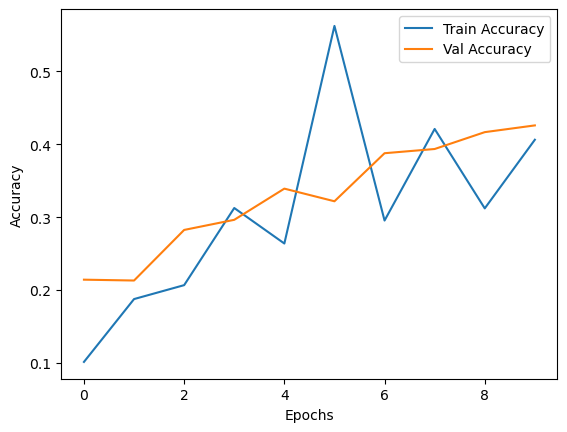

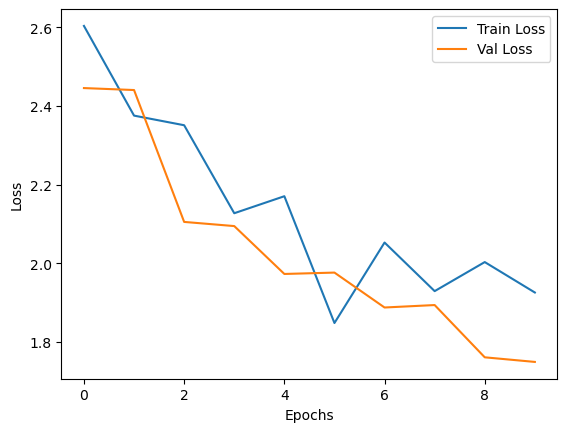

In [35]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Define the model
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    # Flatten and Fully Connected Layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

In [ ]:
# Help develpo classifier with VGG16 

# Load pre-trained ResNet50 model
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')  # Output layer with num_classes nodes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 14)             │         3,598 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,115,854 (91.99 MB)

 Trainable params: 528,142 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Train the model
history = model.fit(
    train_data,
    test_data=test_data,
    epochs=10,  # Adjust epochs based on your data
    steps_per_epoch=train_data.samples // BATCH_SIZE,
    test_steps=test_data.samples // BATCH_SIZE
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 29s 461ms/step - accuracy: 0.0777 - loss: 2.8360 - val_accuracy: 0.0750 - val_loss: 2.6300
Epoch 2/10
 1/60 ━━━━━━━━━━━━━━━━━━━━ 20s 353ms/step - accuracy: 0.1250 - loss: 2.6816

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.1250 - loss: 2.6816 - val_accuracy: 0.0792 - val_loss: 2.6263
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 27s 455ms/step - accuracy: 0.0925 - loss: 2.6250 - val_accuracy: 0.1437 - val_loss: 2.6233
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.0938 - loss: 2.6341 - val_accuracy: 0.1437 - val_loss: 2.6215
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 28s 461ms/step - accuracy: 0.0949 - loss: 2.6236 - val_accuracy: 0.1542 - val_loss: 2.5998
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.0312 - loss: 2.6364 - val_accuracy: 0.1562 - val_loss: 2.6011
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 28s 464ms/step - accuracy: 0.0979 - loss: 2.6182 - val_accuracy: 0.1354 - val_loss: 2.6059
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.0938 - loss: 2.6275 - val_accuracy: 0.1208 - val_loss: 2.6067
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 27s 453ms/step - accuracy: 0.1105 - loss: 2.6123 - val_accuracy: 0.1437 - val_

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 349ms/step - accuracy: 0.1434 - loss: 2.5833
Validation Accuracy: 0.14


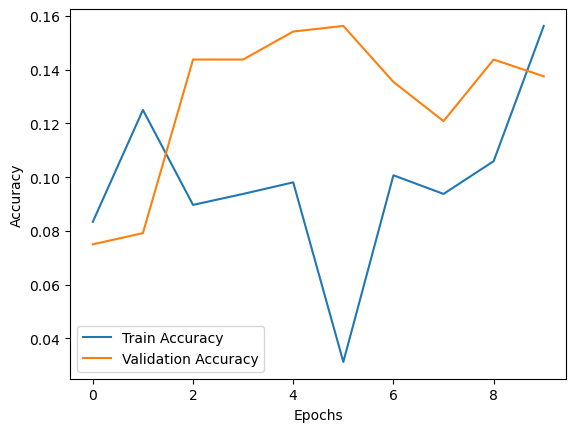

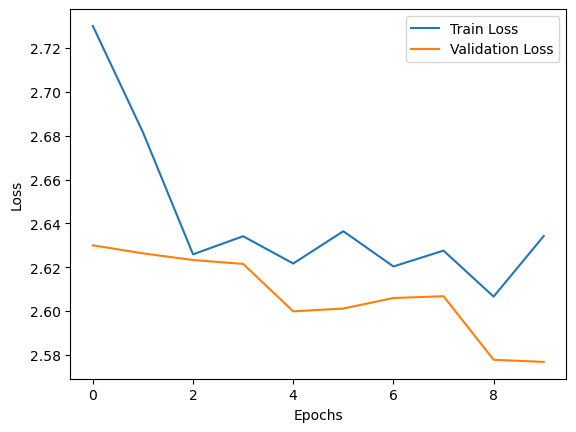

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['test_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['test_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
def plot_images(instances, images_per_row=10, **options):
    size = img_width
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(img_width, img_height, channels) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((img_width, img_height * n_empty)))
    for row in range(n_rows):
        if (row == len(instances)/images_per_row):
            break
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.figure(figsize=(20,20))
    plt.imshow(image, **options)
    plt.axis("off")
    plt.savefig('dogs_images.png', transparent= True, bbox_inches= 'tight', dpi= 900)
    plt.show()

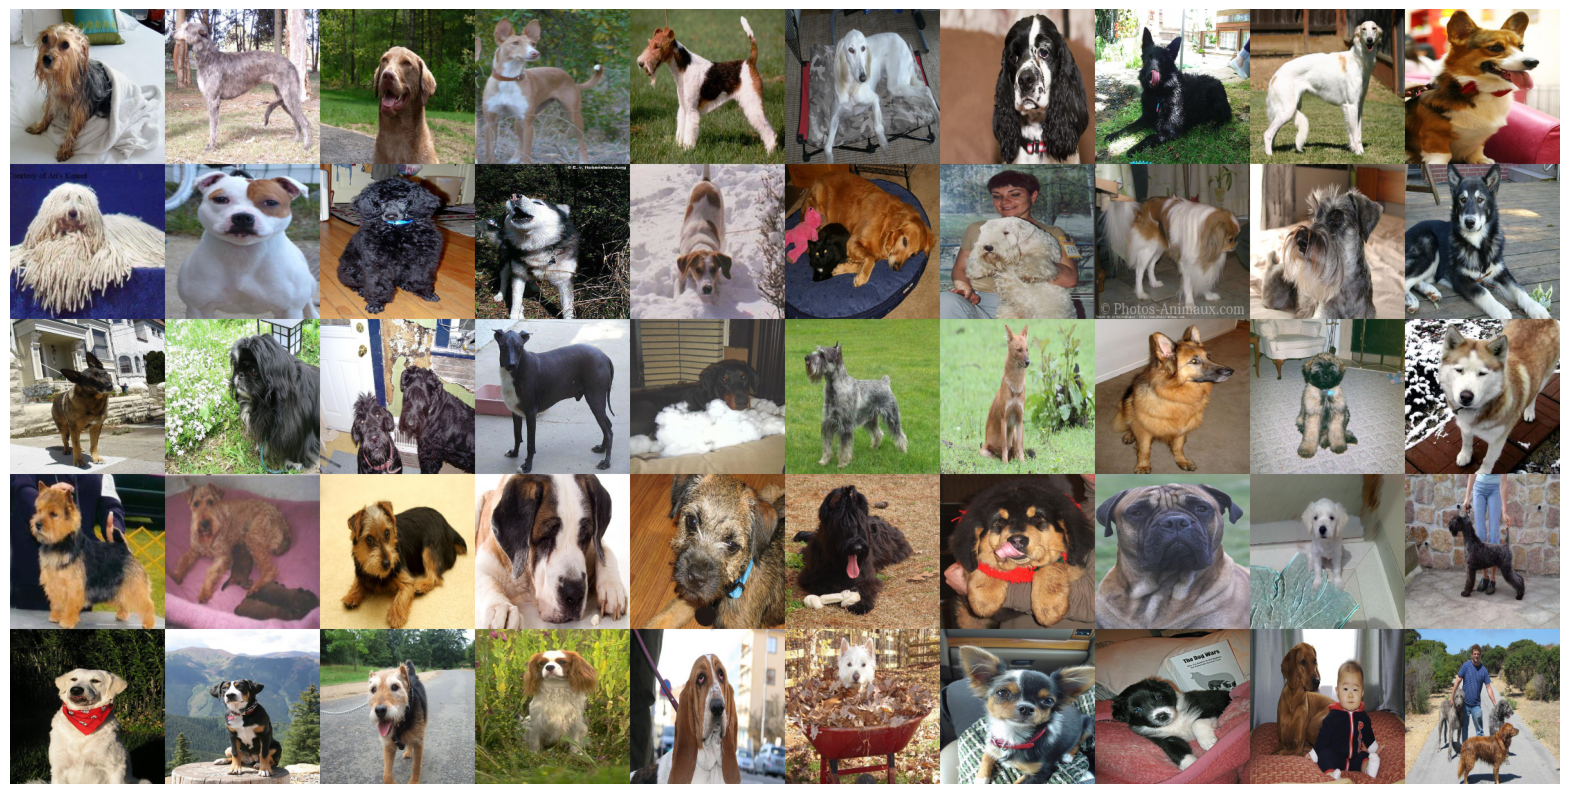

In [15]:
plot_images(images)